### Análise dos resultados gerados com SVM - 35k

Análise dos resuntados produzidos pelo SVM do conjunto com 35k amostras para cada classe.

In [1]:
%run './../../top_k.ipynb'
%run './../../plot_confusion_matrix.ipynb'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import (classification_report, accuracy_score, confusion_matrix, precision_score, 
recall_score)

%matplotlib inline

In [2]:
random_state = 47
np.random.seed(seed=random_state)

In [3]:
labels = np.load('./label_600k_OnlyTri.npy')

In [4]:
saidas = np.load('./saida_600k_OnlyTri.npy')

In [5]:
print(labels.shape)
print(saidas.shape)

(468893,)
(468893,)


In [6]:
labels

array([ 1,  1,  4, ..., 12,  7, 10])

In [7]:
saidas

array([ 1,  1,  1, ...,  2,  4, 10])

### Classification report

In [8]:
print(classification_report(labels, saidas))

             precision    recall  f1-score   support

          0       0.82      0.59      0.68     10576
          1       0.54      0.68      0.60     76404
          2       0.49      0.71      0.58     72386
          3       0.56      0.47      0.52     35350
          4       0.71      0.56      0.62     16742
          5       0.70      0.47      0.56     17994
          6       0.81      0.49      0.61      8407
          7       0.54      0.29      0.38     13915
          8       0.48      0.28      0.35      2646
          9       0.55      0.43      0.49     32193
         10       0.60      0.54      0.57     17421
         11       0.61      0.53      0.57     32951
         12       0.46      0.37      0.41     28585
         13       0.61      0.62      0.61     73048
         14       0.77      0.63      0.69     30275

avg / total       0.59      0.57      0.57    468893



### Transformando em labels

Transformando novamente classes em labels para facilitar interpretação dos resultados.

In [9]:
dict_cat = {
    0: 'Adult',
    1: 'Arts',
    2: 'Business',
    3: 'Computers',
    4: 'Games',
    5: 'Health',
    6: 'Home',
    7: 'Kids',
    8: 'News',
    9: 'Recreation',
    10: 'Reference',
    11: 'Science',
    12: 'Shopping',
    13: 'Society',
    14: 'Sports'
}

def to_category_name(item):
    return dict_cat[item]

In [10]:
saidas_label = np.zeros(shape=(saidas.shape[0]), dtype='object')
labels_label = np.zeros(shape=(labels.shape[0]), dtype='object')

for i in range(labels.shape[0]):
    saidas_label[i] = to_category_name(saidas[i])
    labels_label[i] = to_category_name(labels[i])

In [11]:
print(saidas_label)
print(labels_label)

['Arts' 'Arts' 'Arts' ..., 'Business' 'Games' 'Reference']
['Arts' 'Arts' 'Games' ..., 'Shopping' 'Kids' 'Reference']


In [12]:
#Validando transformação
pos = 874
print(labels[pos])
print(labels_label[pos])

print(saidas[pos])
print(saidas_label[pos])

13
Society
10
Reference


### Classification report

In [13]:
print(classification_report(labels_label, saidas_label))

             precision    recall  f1-score   support

      Adult       0.82      0.59      0.68     10576
       Arts       0.54      0.68      0.60     76404
   Business       0.49      0.71      0.58     72386
  Computers       0.56      0.47      0.52     35350
      Games       0.71      0.56      0.62     16742
     Health       0.70      0.47      0.56     17994
       Home       0.81      0.49      0.61      8407
       Kids       0.54      0.29      0.38     13915
       News       0.48      0.28      0.35      2646
 Recreation       0.55      0.43      0.49     32193
  Reference       0.60      0.54      0.57     17421
    Science       0.61      0.53      0.57     32951
   Shopping       0.46      0.37      0.41     28585
    Society       0.61      0.62      0.61     73048
     Sports       0.77      0.63      0.69     30275

avg / total       0.59      0.57      0.57    468893



### Precisao exata por classe

In [14]:
print(precision_score(labels_label, saidas_label, average=None))

[ 0.82003955  0.54147929  0.49446338  0.56438909  0.71286371  0.70131392
  0.81327312  0.53503352  0.4802589   0.55127396  0.60267914  0.61306938
  0.45840031  0.60674007  0.77450501]


### Recall exato por classe

In [15]:
print(recall_score(labels_label, saidas_label, average=None))

[ 0.58812405  0.68394325  0.70941895  0.47434229  0.55608649  0.46571079
  0.49268467  0.29249012  0.28042328  0.43416271  0.53975088  0.53100058
  0.36910967  0.62233052  0.62794385]


### Accuracy

In [16]:
print(accuracy_score(labels_label, saidas_label))

0.573988095365


### Precision weighted

In [17]:
print(precision_score(labels_label, saidas_label, average='weighted'))

0.586945846811


### Confusion matrix

In [26]:
class_counts = np.unique(saidas_label, return_counts=True)
class_counts

(array(['Adult', 'Arts', 'Business', 'Computers', 'Games', 'Health', 'Home',
        'Kids', 'News', 'Recreation', 'Reference', 'Science', 'Shopping',
        'Society', 'Sports'], dtype=object),
 array([  7585,  96506, 103854,  29710,  13060,  11949,   5093,   7607,
          1545,  25354,  15602,  28540,  23017,  74925,  24546]))

In [19]:
class_names = ['Adult', 'Arts', 'Business', 'Computers', 'Games', 'Health', 'Home',
        'Kids', 'News', 'Recreation', 'Reference', 'Science', 'Shopping',
        'Society', 'Sports']

In [20]:
cm = confusion_matrix(labels_label, saidas_label)

Confusion matrix, without normalization
[[ 6220  1315  1323   281    48    46    11   140    12   219    19    44
    367   454    77]
 [  255 52256  7648  1619   528   256    74   622    88  1878   758  1076
   2161  6485   700]
 [  165  5090 51352  3660   132   525    96   164   130  1504   345  1303
   4129  2921   870]
 [   65  3299  9097 16768   226   147    46   152    55   578   511  1452
    847  1904   203]
 [   29  2623  1185   754  9310    24    17   667    13   411    60   199
    270   901   279]
 [   37  1594  2390   355    42  8380    90    77    22   435   445   809
    398  2722   198]
 [   17  1078   822   211    27   154  4142    46     7   267    61   307
    367   843    58]
 [  172  2474   974   306  1864   114    44  4070    17   702   235  1143
    148  1438   214]
 [    4   458   625   125     7    14     3     4   742    50   126    67
     68   324    29]
 [  135  4983  4650   836   178   254    97   388    58 13977   204   695
   1400  3364   974]
 [   16  1

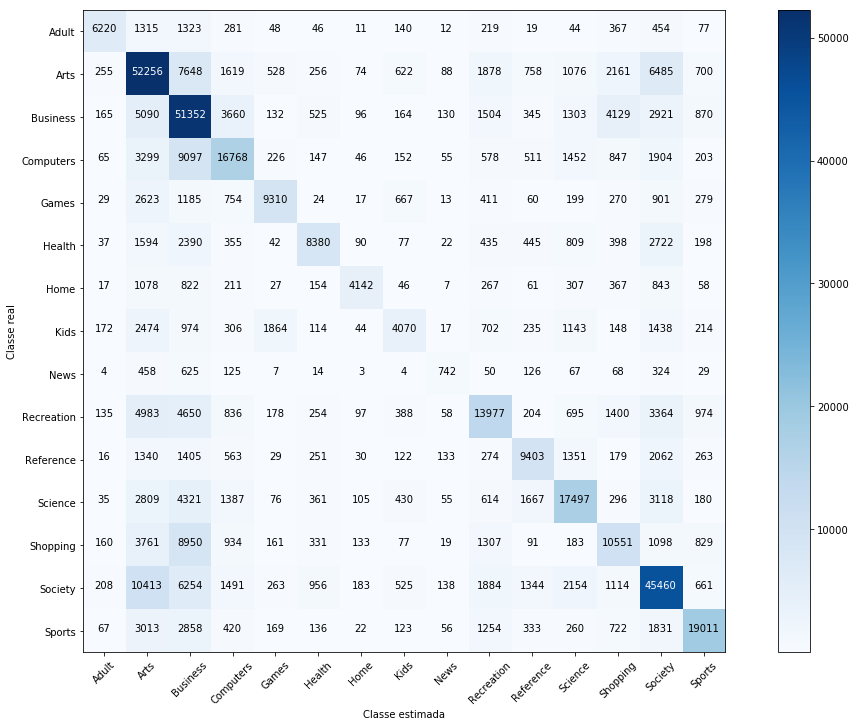

In [21]:
plt.figure(figsize=(6*2.5,4*2.5))
plot_confusion_matrix(cm, classes=class_names,
                      title='')